<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Descomposici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 587 kB/s 
     |████████████████████████████████| 6.4 MB 10.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
##Importar librerías 
import pandas as pd 
import numpy as np 
import yfinance as yf 
import datetime as dt 
import statsmodels.api as sm

#Graficas 
import matplotlib.pyplot as plt
import seaborn as sb 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Importamos datos 
df = yf.download(tickers = 'GE',start='2019-01-01',end='2022-04-30')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,57.384617,62.923077,57.000000,61.923077,61.116108,16816033
2019-01-03,61.692307,63.076923,59.846153,62.000000,61.192028,15983370
2019-01-04,63.000000,63.538464,61.384617,63.307693,62.482681,15610894
2019-01-07,65.769234,67.615387,63.769230,67.230766,66.354622,23358972
2019-01-08,68.538460,69.538460,65.538460,65.846153,64.988060,19107452
2019-01-09,65.538460,67.384613,62.923077,65.384613,64.532532,15119819
2019-01-10,65.384613,68.846153,65.307693,68.769234,67.873047,14604395
2019-01-11,68.230766,68.846153,67.076920,68.769234,67.873047,10487009
2019-01-14,67.769234,69.230766,67.384613,68.461540,67.569359,10618153


In [8]:
##Explorar los datos 
#Extraer una porción de la serie 

df['2022-01-01':'2022-03-31']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,95.220001,97.440002,94.750000,96.239998,96.153625,4619800
2022-01-04,98.779999,100.050003,98.089996,99.370003,99.280823,7624100
2022-01-05,99.730003,101.790001,99.290001,99.370003,99.280823,5894700
2022-01-06,100.449997,101.080002,99.419998,99.949997,99.860298,4277000
2022-01-07,99.800003,102.239998,99.769997,101.400002,101.308998,6248300
...,...,...,...,...,...,...
2022-03-25,94.440002,94.910004,93.410004,94.019997,94.019997,5748800
2022-03-28,93.599998,93.639999,90.720001,92.000000,92.000000,7519400
2022-03-29,93.019997,94.970001,93.019997,94.650002,94.650002,8594400


In [17]:
#Dato puntual de la serie 
df.loc['2021-03-29']

Open         1.033600e+02
High         1.044000e+02
Low          1.022400e+02
Close        1.036000e+02
Adj Close    1.032575e+02
Volume       6.720363e+06
Name: 2021-03-29 00:00:00, dtype: float64

In [18]:
#Variable puntul en fecha puntual
df['Adj Close']['2021-03-31']

104.6927719116211

In [19]:
#Valores de la serie en un lugar específico
df.loc['2021-09']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,105.360001,105.470001,103.260002,103.660004,103.395973,7968100
2021-09-02,104.000000,106.339996,103.980003,106.260002,105.989342,8493700
2021-09-03,106.000000,107.360001,104.080002,104.750000,104.483192,7616900
2021-09-07,104.500000,104.940002,102.309998,103.290001,103.026909,10989500
2021-09-08,102.949997,104.730003,100.419998,102.580002,102.318718,12001300
2021-09-09,102.360001,104.919998,102.110001,103.290001,103.026909,9386500
2021-09-10,103.290001,103.949997,101.779999,102.000000,101.740196,9563600
2021-09-13,102.650002,104.860001,102.019997,104.459999,104.193924,12484200
2021-09-14,104.540001,104.550003,100.070000,100.379997,100.124313,16022600


In [20]:
#Datos a cierre de mes
df.asfreq('M','ffill')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,76.461540,82.846153,75.076920,78.153847,77.135368,45323135
2019-02-28,86.559998,86.800003,82.639999,83.120003,82.036804,11357763
2019-03-31,79.839996,80.239998,79.360001,79.919998,78.962044,6064888
2019-04-30,81.839996,84.239998,79.680000,81.360001,80.384789,22148188
2019-05-31,74.720001,75.760002,74.400002,75.519997,74.614784,5792238
2019-06-30,83.120003,84.000000,82.959999,84.000000,83.073029,5502550
2019-07-31,86.080002,86.320000,80.400002,83.599998,82.677429,21559263
2019-08-31,65.120003,66.080002,64.879997,66.000000,65.271675,5915450
2019-09-30,72.639999,72.800003,71.519997,71.519997,70.807198,4386425


In [21]:
#Datos de la serie con cierre trimestral 
df.asfreq('BQ')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-29,79.839996,80.239998,79.360001,79.919998,78.962044,6064888
2019-06-28,83.120003,84.000000,82.959999,84.000000,83.073029,5502550
2019-09-30,72.639999,72.800003,71.519997,71.519997,70.807198,4386425
2019-12-31,88.000000,89.279999,87.680000,89.279999,88.470352,7082250
2020-03-31,62.959999,65.440002,62.560001,63.520000,63.006474,15143738
2020-06-30,53.680000,54.959999,53.279999,54.639999,54.279514,8689638
2020-09-30,49.119999,50.320000,49.119999,49.840000,49.593018,12097700
2020-12-31,85.199997,86.639999,84.639999,86.400002,86.050934,5962788
2021-03-31,107.040001,107.440002,105.040001,105.040001,104.692772,7823250


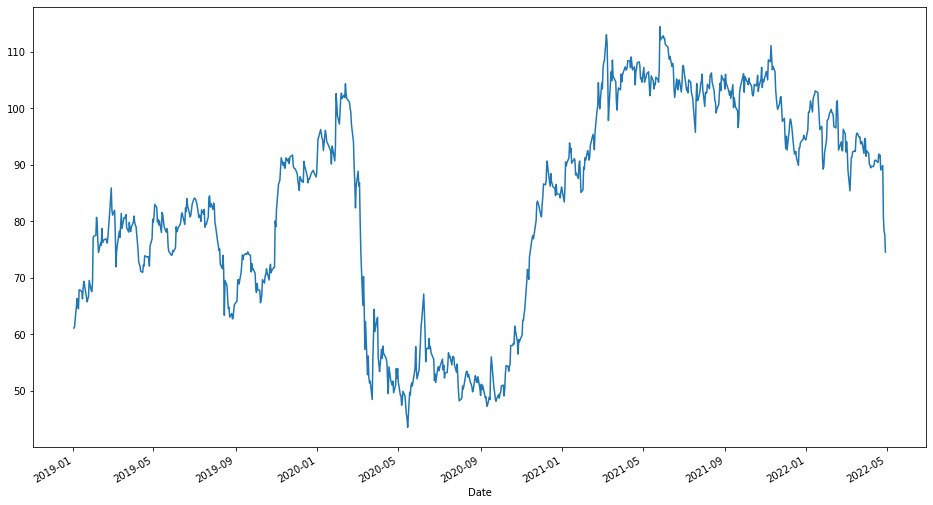

In [22]:
#Gráfico de serie 
plot = df['Adj Close'].plot(figsize = (16,9))

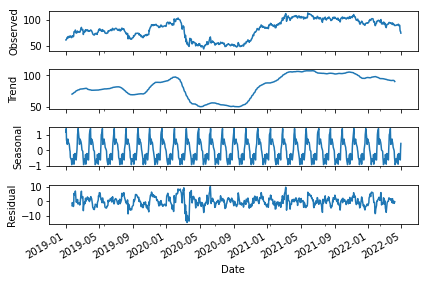

In [28]:
##Modelado 

descomposicionAD = sm.tsa.seasonal_decompose(df['Adj Close'],model='additive',freq = 30)
fig = descomposicionAD.plot()

In [34]:
dfAd = df
dfAd['Tendencia']=descomposicionAD.trend
dfAd['Estacionalidad']=descomposicionAD.seasonal
aleatoriedadAD = descomposicionAD.resid.mean()
variabilidadAD= descomposicionAD.resid.std()
dfAd['Aleatoriedad']=aleatoriedadAD
dfAd

,Open,High,Low,Close,Adj Close,Volume,Tendencia,Estacionalidad,Aleatoriedad
Date,,,,,,,,,
2019-01-02,57.384617,62.923077,57.000000,61.923077,61.116108,16816033,NaN,1.158063,0.03448
2019-01-03,61.692307,63.076923,59.846153,62.000000,61.192028,15983370,NaN,1.387595,0.03448
2019-01-04,63.000000,63.538464,61.384617,63.307693,62.482681,15610894,NaN,0.669355,0.03448
2019-01-07,65.769234,67.615387,63.769230,67.230766,66.354622,23358972,NaN,0.385223,0.03448
2019-01-08,68.538460,69.538460,65.538460,65.846153,64.988060,19107452,NaN,0.594963,0.03448
...,...,...,...,...,...,...,...,...,...
2022-04-25,88.500000,90.000000,86.580002,89.879997,89.879997,6903400,NaN,-0.250052,0.03448
2022-04-26,84.949997,85.230003,78.410004,80.589996,80.589996,28754900,NaN,-0.585723,0.03448
2022-04-27,80.000000,81.750000,77.870003,78.209999,78.209999,12593200,NaN,-0.600704,0.03448


In [35]:
dfAd['Pronóstico realista']=dfAd['Tendencia']+dfAd['Estacionalidad'] + dfAd['Aleatoriedad']
dfAd['Pronóstico optimista']=dfAd['Tendencia']+dfAd['Estacionalidad'] + dfAd['Aleatoriedad'] + (dfAd['Aleatoriedad'] + 1.95*variabilidadAD)
dfAd['Pronóstico Pesimista']=dfAd['Tendencia']+dfAd['Estacionalidad'] + dfAd['Aleatoriedad']+ (dfAd['Aleatoriedad'] - 1.95*variabilidadAD)


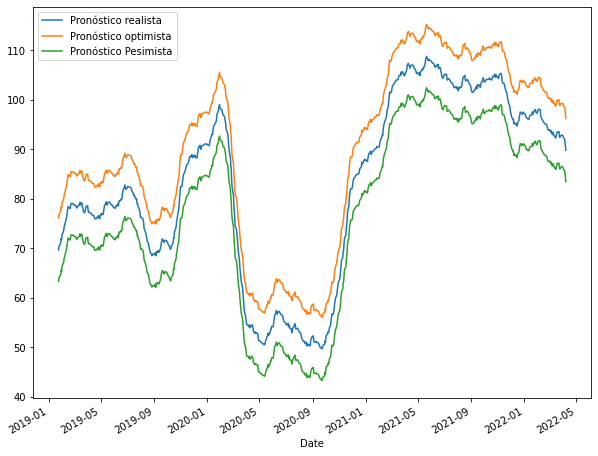

In [36]:
fig = dfAd[['Pronóstico realista','Pronóstico optimista','Pronóstico Pesimista']].plot(figsize=(10,8))